In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary_versus_per_capita.pickle')

In [4]:
salary_df = pd.read_pickle(DATA_DIR / 'postdoc_salary_df_inflation_adjusted_ranking.pickle')

### Plot salary relative to rank

In [5]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,INSTNM,institution
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058,University of Pennsylvania,University of Pennsylvania
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787,Temple University,Temple University
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989,Rensselaer Polytechnic Institute,Rensselaer Polytechnic Institute


In [159]:
area_df = pd.DataFrame(np.unique(salary_df.SOC_TITLE.values.astype(str), return_counts=True)).T
area_df.columns = ['title','count']
area_df = area_df.sort_values(by='count', ascending=False)

In [163]:
area_df[1:11]

,title,count
139,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",2034
18,BIOCHEMISTS AND BIOPHYSICISTS,1647
21,"BIOLOGICAL SCIENTISTS, ALL OTHER",1028
154,"Medical Scientists, Except Epidemiologists",515
26,Biochemists and Biophysicists,440
169,PHYSICISTS,421
36,CHEMISTS,415
133,MATERIALS SCIENTISTS,267
24,BIOMEDICAL ENGINEERS,253
141,MICROBIOLOGISTS,216


In [6]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722


In [7]:
len(salary_df)

34804

In [8]:
# remove unranked institutions
salary_df=salary_df[salary_df.institution.isnull()==False]

In [9]:
salary_df = salary_df.merge(university_df[['institution', 'national_rank', 'CBSA', "CBSA_NAME", 'RPP_all']])

In [10]:
len(salary_df)

27599

In [11]:
## remove outliers
salary_df.sort_values(by="INFLATION_SCALED_BASE_SALARY", ascending=False)[:10]
salary_df = salary_df[
    (salary_df.INFLATION_SCALED_BASE_SALARY > 30000) &
    (salary_df.INFLATION_SCALED_BASE_SALARY < 100000)
]
len(salary_df)

26958

### Get median salaries

In [24]:
salary_df['top_20'] = salary_df.national_rank <= 21

In [28]:
median_top_20_salary = np.median(salary_df[salary_df['top_20'] == True].INFLATION_SCALED_BASE_SALARY)
median_top_20_salary

55522.45791968865

In [27]:
median_overall_salary = np.median(salary_df.INFLATION_SCALED_BASE_SALARY)
median_overall_salary

52999.785469107555

In [29]:
median_not_top_20_salary = np.median(salary_df[salary_df['top_20'] == False].INFLATION_SCALED_BASE_SALARY)
median_not_top_20_salary

51964.730835240276

#### Plot salary histogram

In [31]:
import seaborn as sns

In [32]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

In [33]:
top_20_color = pal[3]

In [34]:
bins = np.linspace(30000, 80000, 35)

(40000.0, 80000.0)

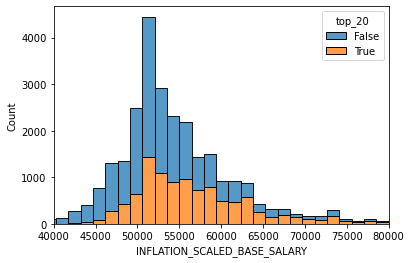

In [35]:
fig, ax = plt.subplots()
ax = sns.histplot(
    data = salary_df,
    x = "INFLATION_SCALED_BASE_SALARY",
    hue = "top_20",
    ax=ax,
    lw=1,
    bins = bins,
    color=top_20_color,
    multiple = "stack",
    fill=True,
)
ax.set_xlim([40000, 80000])

(40000.0, 75000.0)

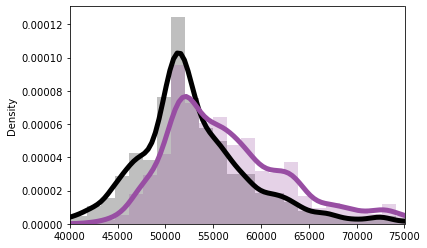

In [36]:
fig, ax = plt.subplots()

ax = sns.kdeplot(
    salary_df[salary_df.national_rank >= 21].INFLATION_SCALED_BASE_SALARY.values,
    lw=5,
    # cumulative=True,
    # kind="ecdf",
    ax=ax,
    color="k",
    # fill=True,
)
plt.hist(
    salary_df[salary_df.national_rank >= 21].INFLATION_SCALED_BASE_SALARY.values,
    bins=bins,
    density=True,
    alpha=0.25,
    color="k",
)

ax = sns.kdeplot(
    salary_df[salary_df.national_rank < 21].INFLATION_SCALED_BASE_SALARY.values,
    ax=ax,
    # cumulative=True,
    # kind="ecdf",
    lw=5,
    color=top_20_color,
    # fill=True,
)

plt.hist(
    salary_df[salary_df.national_rank < 21].INFLATION_SCALED_BASE_SALARY.values,
    bins=bins,
    density=True,
    alpha=0.25,
    color=top_20_color,
)
ax.set_xlim([40000, 75000])


### Get real salary

In [37]:
salary_df["REAL_SALARY"] = salary_df.INFLATION_SCALED_BASE_SALARY / (salary_df.RPP_all/100)

In [38]:
median_top_20_salary_real = np.median(salary_df[salary_df['top_20'] == True].REAL_SALARY)
median_top_20_salary_real

50282.541919071315

In [40]:
median_overall_salary_real = np.nanmedian(salary_df.REAL_SALARY)
median_overall_salary_real

51924.691934369206

In [42]:
median_not_top_20_salary_real = np.nanmedian(salary_df[salary_df['top_20'] == False].REAL_SALARY)
median_not_top_20_salary_real

53115.25341130605

(35000.0, 80000.0)

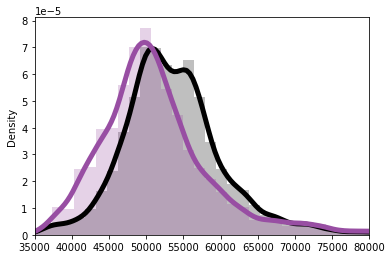

In [43]:
fig, ax = plt.subplots()

ax = sns.kdeplot(
    salary_df[salary_df.national_rank >= 21].REAL_SALARY.values,
    lw=5,
    # cumulative=True,
    # kind="ecdf",
    ax=ax,
    color="k",
    # fill=True,
)
plt.hist(
    salary_df[salary_df.national_rank >= 21].REAL_SALARY.values,
    bins=bins,
    density=True,
    alpha=0.25,
    color="k",
)

ax = sns.kdeplot(
    salary_df[salary_df.national_rank < 21].REAL_SALARY.values,
    ax=ax,
    # cumulative=True,
    # kind="ecdf",
    lw=5,
    color=top_20_color,
    # fill=True,
)

plt.hist(
    salary_df[salary_df.national_rank < 21].REAL_SALARY.values,
    bins=bins,
    density=True,
    alpha=0.25,
    color=top_20_color,
)
ax.set_xlim([35000, 80000])


In [44]:
len(university_df)

6442

In [45]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722


In [53]:
np.std(university_df["MEDIAN_SALARY"])

3755.969342949507

In [54]:
np.std(university_df["REAL_MEDIAN_SALARY"])

4379.213735232744

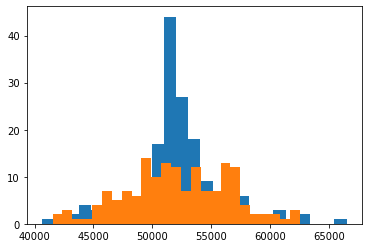

In [48]:
plt.hist(university_df["MEDIAN_SALARY"], bins=25);
plt.hist(university_df["REAL_MEDIAN_SALARY"], bins=25);

In [55]:
# remove universitties we don't have access to 
university_df = university_df[university_df.MEDIAN_SALARY.isnull()==False]
university_df = university_df[university_df.RPP_all.isnull()==False]

In [56]:
# remove salaries where we have less than 10 datapoints
university_df = university_df[university_df.N_SALARIES > 10]

### Plot postdoc salary relative to median by RPP

In [57]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722


In [58]:
len(university_df)

156

#### Get difference between median salary and salary for university

In [98]:
median_university_salary_real = np.median(university_df["REAL_MEDIAN_SALARY"])
median_university_salary_real

52081.72468057003

In [99]:
median_university_salary = np.median(university_df["MEDIAN_SALARY"])
median_university_salary

52137.46930640111

In [100]:
university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"] = (
    university_df["REAL_MEDIAN_SALARY"] - median_university_salary_real
)
university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER"] = (
    university_df["REAL_MEDIAN_SALARY_UPPER"] - median_university_salary_real
)
university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER"] = (
    university_df["REAL_MEDIAN_SALARY_LOWER"] - median_university_salary_real
)

In [101]:
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN"] = university_df["MEDIAN_SALARY"] - median_university_salary
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN_UPPER"] = (
    university_df["MEDIAN_SALARY_UPPER"] - median_university_salary
)
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN_LOWER"] = (
    university_df["MEDIAN_SALARY_LOWER"] - median_university_salary
)

In [102]:
import seaborn as sns

In [103]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

In [104]:
overall_median_salary = np.median(university_df["MEDIAN_SALARY"])
overall_median_salary

52137.46930640111

In [105]:
from postdocsalary.paths import save_fig, FIGURE_DIR

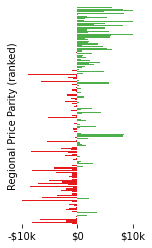

In [106]:
sort_mask = np.argsort(university_df["RPP_all"].values)
y = university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN"].values[sort_mask]
fig, ax = plt.subplots(figsize=(2,4))
ax.barh(
    np.arange(len(university_df)),
    y,
    color = [pal[2] if np.sign(i)> 0 else pal[0] for i in y]
)
ax.set_ylabel('Regional Price Parity (ranked)')
ax.set_yticks([])
ax.set_ylim([0, len(university_df)])
ax.set_xlim([-10000, 10000])
ax.set_xticks([-10000,0, 10000])
ax.set_xticklabels(['-$10k', '$0', '$10k'])
[i.set_linewidth(0.) for i in ax.spines.values()]

save_fig(FIGURE_DIR / '2020_median_salary')

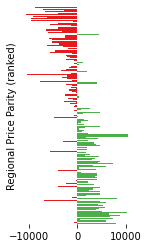

In [107]:
sort_mask = np.argsort(university_df["RPP_all"].values)
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask]
fig, ax = plt.subplots(figsize=(2,4))
ax.barh(
    np.arange(len(university_df)),
    y,
    color = [pal[2] if np.sign(i)> 0 else pal[0] for i in y]
)
ax.set_ylim([0, len(university_df)])
ax.set_ylabel('Regional Price Parity (ranked)')
ax.set_yticks([])
[i.set_linewidth(0.) for i in ax.spines.values()]

save_fig(FIGURE_DIR / '2020_median_real_salary')

### Compute the relative value of top-ranked university salaries relative to the median salary

In [108]:
mean_top_10_salary_relative_to_average = np.mean(university_df[:10].UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN)
print(
    "Average top 10 salary relative to median: {} ({}%)".format(
        round(mean_top_10_salary_relative_to_average, 2),
        round(mean_top_10_salary_relative_to_average / overall_median_salary * 100, 2),
    )
)

Average top 10 salary relative to median: -2824.79 (-5.42%)


In [109]:
mean_top_20_salary_relative_to_average = np.mean(university_df[:20].UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN)
print(
    "Average top 20 salary relative to median: {} ({}%)".format(
        round(mean_top_20_salary_relative_to_average, 2),
        round(mean_top_20_salary_relative_to_average / overall_median_salary * 100, 2),
    )
)

Average top 20 salary relative to median: -2550.82 (-4.89%)


### Plot the relative salaries of the top universities

In [110]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

In [111]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income,UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN,UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER,UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER,UNIVERSITY_SALARY_RELATIVE_MEDIAN,UNIVERSITY_SALARY_RELATIVE_MEDIAN_UPPER,UNIVERSITY_SALARY_RELATIVE_MEDIAN_LOWER
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722,-3783.939728,-3451.466188,-4284.631602,3646.472314,4030.479252,3068.173200
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662,-2771.066559,-2105.461377,-2868.868495,10339.134534,11182.456299,10215.219481
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722,-3025.606424,-2741.522910,-3454.614302,4522.347280,4850.463738,4026.843180


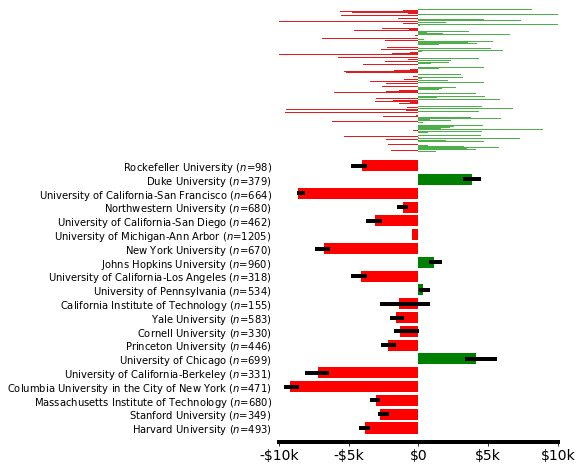

In [165]:
nex = 20
top_n = 150
sort_mask = np.argsort(university_df["national_rank"].values)
fig, axs = plt.subplots(
    nrows=2,
    figsize=(5, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(university_df))[nex:top_n],
    y,
    color=[pal[2] if np.sign(i) > 0 else pal[0] for i in y],
)
ax.set_xlim([-10000, 10000])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(university_df))[:nex] + 1,
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)

xerr = np.array((
        y - university_df.UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER.values[sort_mask][
            :nex
        ],
        y - university_df.UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER.values[sort_mask][
            :nex
        ],
    ))
xerr[1,:] *= -1
ax.errorbar(
    y,
    np.arange(len(university_df))[:nex] + 1,
    xerr=xerr,
    ls='none',
    color = 'k',
    lw = 4
    
)

# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim([-10000, 10000])
ax.set_ylim([0, nex + 1])
# ax.set_xticks([])
ax.set_yticks(np.arange(1, nex + 1))

names = [
    "{} ($n$={})".format(i, j)
    for i, j in zip(
        university_df["INSTNM"].values[sort_mask][:nex],
        university_df["N_SALARIES"].values[sort_mask][:nex],
    )
    
]
ax.set_yticklabels(names)
# ax.set_yticklabels(university_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks([-10000, -5000, 0, 5000, 10000])
ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
save_fig(FIGURE_DIR / 'institution_real salary')

### Plot the highest and lowest salary universities

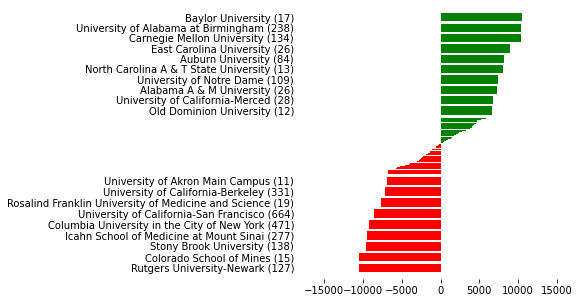

In [27]:
nex = 10
sort_mask = np.argsort(university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values)
fig, axs = plt.subplots(
    nrows=3,
    figsize=(5, 5),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [2, 1, 2]},
)

ax = axs[2]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(university_df))[:nex] + 1,
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_xlim([-18000, 18000])
ax.set_ylim([0, nex])
# ax.set_xticks([])
ax.set_yticks(np.arange(1, nex))
ax.tick_params(left=False)
names = [
    "{} ({})".format(i, j)
    for i, j in zip(
        university_df["INSTNM"].values[sort_mask][:nex],
        university_df["N_SALARIES"].values[sort_mask][:nex],
    )
]
ax.set_yticklabels(names)


ax = axs[0]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][-nex:]
ax.barh(
    np.arange(len(university_df) - nex, len(university_df)),
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_xlim([-18000, 18000])
ax.set_ylim([len(university_df) - nex -0.5, len(university_df) ])
# ax.set_xticks([])
ax.set_yticks(np.arange(len(university_df)-nex, len(university_df)))
ax.set_yticklabels(university_df["INSTNM"].values[sort_mask][-nex:][::-1])

names = [
    "{} ({})".format(i, j)
    for i, j in zip(
        university_df["INSTNM"].values[sort_mask][-nex:][::-1],
        university_df["N_SALARIES"].values[sort_mask][-nex:][::-1],
    )
]
ax.set_yticklabels(names)

ax.set_xticks([])
ax.tick_params(left=False)

ax = axs[1]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][nex:-nex]
ax.barh(
    np.arange(len(university_df))[nex:-nex],
    y,
    color=["green" if np.sign(i) > 0 else "red" for i in y],
)
ax.set_xlim([-18000, 18000])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(left=False)


### Compare CSA to population

In [40]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income,UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN,UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER,UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER,UNIVERSITY_SALARY_RELATIVE_MEDIAN
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722,-3783.939728,-3451.466188,-4284.631602,3646.472314
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662,-2771.066559,-2105.461377,-2868.868495,10339.134534
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722,-3025.606424,-2741.522910,-3454.614302,4522.347280


In [41]:
CSA_pop = pd.read_csv(DATA_DIR / 'statistical_areas' / 'CSA_pop.csv')

In [42]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [43]:
CSA_pop["Population 2010"] = [int(strip_name(i)) if type(i) == str else np.nan for i in CSA_pop["Population 2010"]]

In [44]:
university_df = university_df.merge(CSA_pop[["CBSA Code", "Population 2010"]], left_on="CBSA", right_on="CBSA Code", how='left')

(0.0, 156.0)

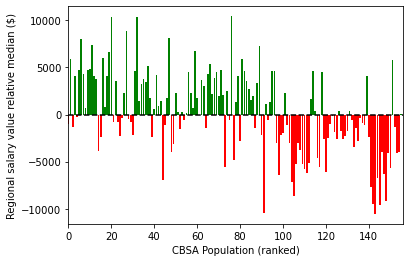

In [45]:
sort_mask = np.argsort(university_df["Population 2010"].values)
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask]
fig, ax = plt.subplots()
ax.bar(
    np.arange(len(university_df)),
    y,
    color = ['green' if np.sign(i)> 0 else 'red' for i in y]
)
ax.axhline(0, color="k", ls="dashed")
ax.set_xlabel('CBSA Population (ranked)')
ax.set_ylabel('Regional salary value relative median ($)')
ax.set_xlim([0, len(university_df)])

Text(0, 0.5, 'Regional salary value relative median ($)')

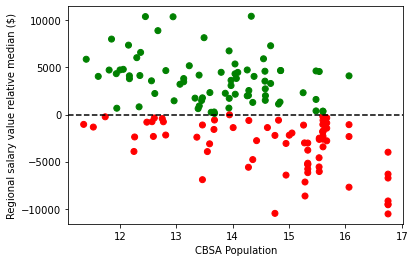

In [46]:
sort_mask = np.argsort(university_df["Population 2010"].values)
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask]
fig, ax = plt.subplots()
ax.scatter(
    np.log(university_df["Population 2010"].values[sort_mask]),
    y,
    color = ['green' if np.sign(i)> 0 else 'red' for i in y]
)
ax.axhline(0, color="k", ls="dashed")
ax.set_xlabel('CBSA Population')
ax.set_ylabel('Regional salary value relative median ($)')
#ax.set_xlim([0, len(university_df)])

In [47]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,INSTNM,institution,national_rank,CBSA,CBSA_NAME,RPP_all,top_20
0,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.50000,71683.249058,University of Pennsylvania,University of Pennsylvania,11.0,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,True
1,POSTDOCTORAL FELLOW,STATISTICIANS,Y,2019-07-16 15:35:18,2019-09-01 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,58989.0,NaN,Year,58989.0,Year,Level I,PLACE OF EMPLOYMENT,2019-07-16 15:35:18,2020Q4,58989.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,58989.00000,61302.045981,University of Pennsylvania,University of Pennsylvania,11.0,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,True
2,POSTDOCTORAL RESEARCHER,STATISTICIANS,Y,2017-06-26 00:00:00,2017-07-12 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,NaN,PHILADELPHIA,PA,19104,NaN,PHILADELPHIA,PHILADELPHIA,PA,19104,52140.0,NaN,Year,NaN,NaN,NaN,NaN,2017-06-26 00:00:00,2020Q4,52140.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,54045.12323,56164.312487,University of Pennsylvania,University of Pennsylvania,11.0,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,True


### Plot salary by cost of living

In [48]:
salary_df = salary_df.merge(CSA_pop[["CBSA Code", "Population 2010"]], left_on="CBSA", right_on="CBSA Code", how='left')

In [49]:
len(salary_df)

26659

(array([1288., 5633., 2157., 6429., 4623.,  300., 3074.,   30., 2130.,
         995.]),
 array([ 85.1 ,  90.04,  94.98,  99.92, 104.86, 109.8 , 114.74, 119.68,
        124.62, 129.56, 134.5 ]),
 <a list of 10 Patch objects>)

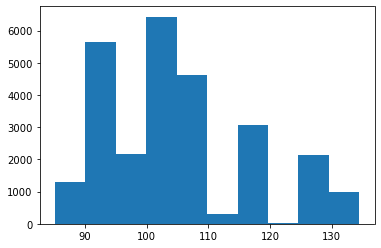

In [50]:
plt.hist(salary_df["RPP_all"])

In [51]:
salary_df["RPP_above_avg"] = salary_df.RPP_all > 100

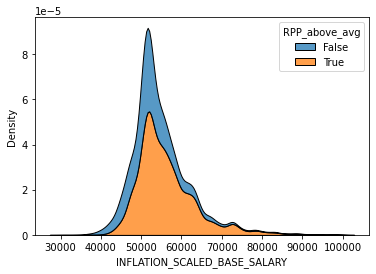

In [52]:
fig, ax = plt.subplots()
ax = sns.kdeplot(
    data = salary_df,
    x = 'INFLATION_SCALED_BASE_SALARY',
    hue = 'RPP_above_avg',
    ax=ax,
    #cumulative=True,
    #kind="ecdf",
    #lw=5,
    color='red',
    multiple="stack"
)

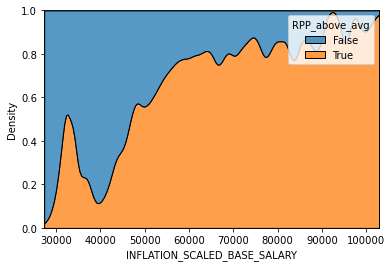

In [53]:
fig, ax = plt.subplots()
ax = sns.kdeplot(
    data = salary_df,
    x = 'INFLATION_SCALED_BASE_SALARY',
    hue = 'RPP_above_avg',
    ax=ax,
    #cumulative=True,
    #kind="ecdf",
    #lw=5,
    color='red',
    multiple="fill"
)

In [54]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

Text(0, 0.5, '')

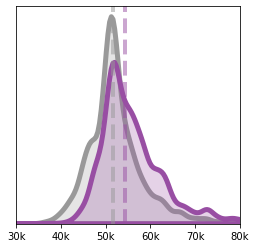

In [55]:
fig, ax = plt.subplots(figsize=(4,4))
color = pal[8]
ax = sns.kdeplot(
    salary_df[salary_df.RPP_all <= 100].INFLATION_SCALED_BASE_SALARY.values,
    lw=5,
    #cumulative=True,
    #kind="ecdf",
    ax=ax,
    color = color,
    fill = True,
    
)
ax.axvline(np.median(salary_df[salary_df.RPP_all <= 100].INFLATION_SCALED_BASE_SALARY.values), color = color, lw=4, ls='dashed', alpha = 0.5)

color = pal[3]
ax = sns.kdeplot(
    salary_df[salary_df.RPP_all > 100].INFLATION_SCALED_BASE_SALARY.values,
    ax=ax,
    #cumulative=True,
    #kind="ecdf",
    lw=5,
    color=color,
    fill = True,
)
ax.axvline(np.median(salary_df[salary_df.RPP_all > 100].INFLATION_SCALED_BASE_SALARY.values), color = color, lw=4, ls='dashed', alpha = 0.5)
ax.set_xlim([30000, 80000])
ax.set_xticks([30000, 40000, 50000, 60000, 70000, 80000])
ax.set_xticklabels(['30k', '40k', '50k', '60k', '70k', '80k'])
ax.set_yticks([])
ax.set_ylabel('')

In [56]:
len(salary_df)

26659

In [57]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,INSTNM,institution,national_rank,CBSA,CBSA_NAME,RPP_all,top_20,CBSA Code,Population 2010,RPP_above_avg
0,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.50000,71683.249058,University of Pennsylvania,University of Pennsylvania,11.0,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,True,37980.0,5965343.0,True
1,POSTDOCTORAL FELLOW,STATISTICIANS,Y,2019-07-16 15:35:18,2019-09-01 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,58989.0,NaN,Year,58989.0,Year,Level I,PLACE OF EMPLOYMENT,2019-07-16 15:35:18,2020Q4,58989.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,58989.00000,61302.045981,University of Pennsylvania,University of Pennsylvania,11.0,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,True,37980.0,5965343.0,True
2,POSTDOCTORAL RESEARCHER,STATISTICIANS,Y,2017-06-26 00:00:00,2017-07-12 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,NaN,PHILADELPHIA,PA,19104,NaN,PHILADELPHIA,PHILADELPHIA,PA,19104,52140.0,NaN,Year,NaN,NaN,NaN,NaN,2017-06-26 00:00:00,2020Q4,52140.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,54045.12323,56164.312487,University of Pennsylvania,University of Pennsylvania,11.0,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,True,37980.0,5965343.0,True


In [58]:
salary_by_CBSA = pd.DataFrame(np.unique(salary_df.CBSA_NAME.values, return_counts=True)).T
salary_by_CBSA.columns = ['CBSA_NAME', 'COUNTS']
salary_by_CBSA = salary_by_CBSA.sort_values(by='COUNTS', ascending=False)

In [59]:
base_salaries = []
rpps = []
true_salaries = []
for idx, row in salary_by_CBSA.iterrows():
    MEDIAN_BASE_SALARY = np.median(salary_df[salary_df.CBSA_NAME == row.CBSA_NAME].INFLATION_SCALED_BASE_SALARY.values)
    RPP = salary_df[salary_df.CBSA_NAME == row.CBSA_NAME].RPP_all.values[0]
    TRUE_SALARY = int(MEDIAN_BASE_SALARY / (RPP/100))
    base_salaries.append(MEDIAN_BASE_SALARY)
    rpps.append(RPP)
    true_salaries.append(TRUE_SALARY)

In [60]:
salary_by_CBSA["MEDIAN_SALARY"] = np.array(base_salaries).astype(int)
salary_by_CBSA["RPP"] = np.array(rpps).round()
salary_by_CBSA["TRUE_SALARY"] = true_salaries

In [61]:
salary_by_CBSA[:50]

,CBSA_NAME,COUNTS,MEDIAN_SALARY,RPP,TRUE_SALARY
58,"New York-Newark-Jersey City, NY-NJ-PA",1781,55695,126.0,44308
15,"Boston-Cambridge-Newton, MA-NH",1683,55474,116.0,48030
39,"Houston-The Woodlands-Sugar Land, TX",1667,51878,102.0,51011
21,"Chicago-Naperville-Elgin, IL-IN-WI",1485,53434,103.0,51978
10,"Baltimore-Columbia-Towson, MD",1304,55538,106.0,52493
4,"Ann Arbor, MI",1205,51964,101.0,51654
75,"San Francisco-Oakland-Berkeley, CA",995,59110,134.0,43948
61,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",949,54717,105.0,51963
48,"Los Angeles-Long Beach-Anaheim, CA",769,57476,119.0,48381
31,"Durham-Chapel Hill, NC",720,52766,95.0,55660
